# Universidade Estadual de Campinas - Trabalho de Conclusão de Curso 
## Autor - João Velanes 237824

### Parte 1 - Import das bibliotecas a serem utilizadas no projeto 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import torch.nn.init as init
from torchmetrics import Precision, Recall, Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from datetime import datetime



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Arquivo Concatenado/falha_2.csv")


In [4]:
df

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-05-13 01:53:17.000000,27840330.0,20228170.0,124.573200,4065790.0,90.81752,NaN,NaN,NaN,0.0
1,2018-05-13 01:53:18.000000,27840590.0,20228170.0,124.573200,4065790.0,90.81752,NaN,NaN,NaN,0.0
2,2018-05-13 01:53:19.000000,27840330.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
3,2018-05-13 01:53:20.000000,27840590.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
4,2018-05-13 01:53:21.000000,27840330.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
655012,2017-03-29 04:52:42.000000,0.0,10763410.0,8.439219,NaN,NaN,NaN,NaN,2.0,NaN
655013,2017-03-29 04:52:43.000000,0.0,10764910.0,8.437844,NaN,NaN,NaN,NaN,2.0,NaN
655014,2017-03-29 04:52:44.000000,0.0,10766400.0,8.436469,NaN,NaN,NaN,NaN,2.0,NaN
655015,2017-03-29 04:52:45.000000,0.0,10767900.0,8.435095,NaN,NaN,NaN,NaN,2.0,NaN


In [5]:
df["class"].unique()

array([  0., 102.,   2.,  nan])

In [6]:
df1 = df.copy()
df1.drop(columns=["T-JUS-CKGL","timestamp"], inplace=True)
df1.dropna(inplace=True)
df1["class"] = df1["class"].astype(str)
df1["class"].replace({"2.0":"2.0","102.0":"1.0"},inplace=True)
df1["class"] = df1["class"].astype(float)
df1["class"] = df1["class"].astype(int)
print(df1["class"].unique())
#df1.columns

[0 1 2]


In [13]:
print(df1.sample(20))

             P-PDG       P-TPT      T-TPT  P-MON-CKP  T-JUS-CKP    P-JUS-CKGL  \
511281         0.0   4646921.0   26.80136  2767517.0   37.12575  2.220197e+06   
461928         0.0  18852350.0  116.78250  9597521.0  173.09610  2.911662e+06   
467191         0.0   8680060.0   21.82623  4916542.0  173.09610  2.952163e+06   
517238  22132710.0  13948080.0   56.95400  5615519.0   32.73619  1.599162e+09   
516937  22133750.0  14030810.0   57.53200  5643094.0   32.66328  1.600653e+09   
461974         0.0  18852350.0  116.78830  9597444.0  173.09610  2.912016e+06   
465651         0.0  11821790.0   38.98331  6091122.0  173.09610  2.940312e+06   
508689         0.0  11810150.0  107.04400  6174767.0   48.14461  2.221395e+06   
510700         0.0   4696130.0   31.96398  2770016.0   38.56770  2.220465e+06   
506772         0.0  11799770.0  107.06800  6101387.0   48.40838  2.222281e+06   
515564  22129520.0  14185950.0   57.80400  5746048.0   32.44184  1.600920e+09   
512740  22130800.0  14193990

In [169]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format='mixed', dayfirst=True)


,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-05-13 01:53:17,27840330.0,20228170.0,124.573200,4065790.0,90.81752,NaN,NaN,NaN,0.0
1,2018-05-13 01:53:18,27840590.0,20228170.0,124.573200,4065790.0,90.81752,NaN,NaN,NaN,0.0
2,2018-05-13 01:53:19,27840330.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
3,2018-05-13 01:53:20,27840590.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
4,2018-05-13 01:53:21,27840330.0,20228170.0,124.573200,4065790.0,90.81753,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
655012,2017-03-29 04:52:42,0.0,10763410.0,8.439219,NaN,NaN,NaN,NaN,2.0,NaN
655013,2017-03-29 04:52:43,0.0,10764910.0,8.437844,NaN,NaN,NaN,NaN,2.0,NaN
655014,2017-03-29 04:52:44,0.0,10766400.0,8.436469,NaN,NaN,NaN,NaN,2.0,NaN
655015,2017-03-29 04:52:45,0.0,10767900.0,8.435095,NaN,NaN,NaN,NaN,2.0,NaN


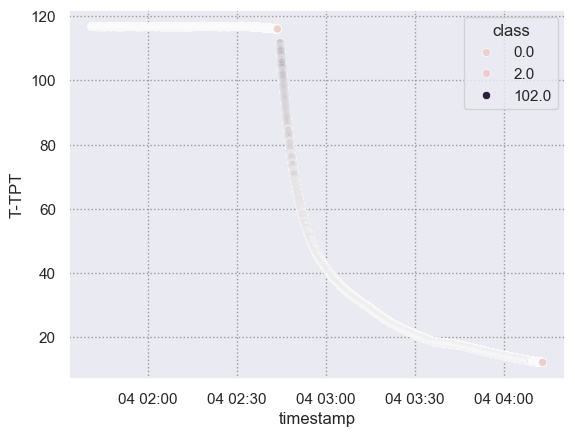

In [184]:
sns.scatterplot(x="timestamp",y="T-TPT",data=df.dropna(subset="T-TPT")[df.dropna(subset="T-TPT")["timestamp"].dt.strftime("%Y")<"2015"],hue="class")
sns.set_theme() # to make style changable from defaults use this line of code befor using set_style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

In [126]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 50)
        self.bn1 = nn.BatchNorm1d(50)
        self.fc2 = nn.Linear(50, 35)
        self.bn2 = nn.BatchNorm1d(35)
        self.fc3 = nn.Linear(35, 80)
        self.bn3 = nn.BatchNorm1d(80)
        self.fc4 = nn.Linear(80, 5)
        self.bn4 = nn.BatchNorm1d(5)
        self.fc5 = nn.Linear(5,3)                                 

        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight)
        init.kaiming_uniform_(self.fc4.weight)
        init.kaiming_uniform_(self.fc5.weight)
        
        
    def forward(self, x):
        x = nn.functional.elu( self.bn1(self.fc1(x)))
        x = nn.functional.elu( self.bn2(self.fc2(x)))
        x = nn.functional.elu( self.bn3(self.fc3(x)))
        x = nn.functional.elu( self.bn4(self.fc4(x)))
        x = self.fc5(x)
        return x

In [127]:
class Classe2(Dataset):
    def __init__(self,data):
        super(Classe2, self).__init__()
        self.data = data.to_numpy(dtype=np.float32) # Usar float 32 por que os pesos da Rede Neural sao Float32
        #display(data)
        
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        feature = self.data[idx,:-1]
        label = int(self.data[idx,-1])
        return feature, label

In [128]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [129]:
y_train.astype(str).value_counts()

class
0    11225
2     7874
1     2599
Name: count, dtype: int64

In [130]:
# Assuming x_train is a pandas DataFrame
#scaler = MinMaxScaler()
#scaler = MaxAbsScaler()
#scaler = Normalizer()
scaler = StandardScaler()
# Fit the scaler and transform the data
x_train_scaled = scaler.fit_transform(x_train)

# Convert the scaled data back to a DataFrame, preserving the column names
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Now x_train_scaled_df is a DataFrame with the same columns as x_train
x_train_scaled_df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
0,-0.790846,-0.673459,-0.940390,-0.212697,1.349157,-0.790210,-0.719007
1,-0.790846,-0.769761,-1.156912,-0.820270,1.349157,-0.791383,-0.719007
2,1.290000,-1.406117,-1.314728,-1.848050,-0.860475,1.280245,0.117253
3,-0.790846,0.037312,1.259209,0.285342,-0.558720,-0.791134,-0.719007
4,-0.790846,1.677424,1.510441,1.797299,1.349157,-0.790253,-0.719007


In [131]:
# Fazendo o feature scaling para os dados teste
x_test_scaled = scaler.fit_transform(x_test)

# Convert the scaled data back to a DataFrame, preserving the column names
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Now x_train_scaled_df is a DataFrame with the same columns as x_train
x_train_scaled_df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
0,-0.790846,-0.673459,-0.940390,-0.212697,1.349157,-0.790210,-0.719007
1,-0.790846,-0.769761,-1.156912,-0.820270,1.349157,-0.791383,-0.719007
2,1.290000,-1.406117,-1.314728,-1.848050,-0.860475,1.280245,0.117253
3,-0.790846,0.037312,1.259209,0.285342,-0.558720,-0.791134,-0.719007
4,-0.790846,1.677424,1.510441,1.797299,1.349157,-0.790253,-0.719007


### Treinamento do Modelo

In [144]:

# Initialize dataset and dataloader
dataset_train = Classe2(pd.concat([x_train_scaled_df.reset_index(drop=True), # Resetar e dropar index para concatenar corretamente 
                                   y_train.reset_index(drop=True)], axis=1))
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)

# Initialize the neural network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.00001) #0.00001

# Initialize metrics
metric_precision = Precision(task="multiclass", num_classes=3, average="weighted")
metric_recall = Recall(task="multiclass", num_classes=3, average="weighted")

# Loss storage
total_loss = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize epoch loss

    # Reset metrics at the beginning of each epoch
    metric_precision.reset()
    metric_recall.reset()

    for features, labels in dataloader_train:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = net(features)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate loss

        # Calculate predictions and update metrics
        _, preds = torch.max(outputs, dim=1)
        metric_precision.update(preds, labels)
        metric_recall.update(preds, labels)
        total_loss.append(epoch_loss)
    # Compute average loss for the epoch
    average_loss = epoch_loss / len(dataloader_train)

    # Compute precision and recall for the epoch
    precision = metric_precision.compute()
    recall = metric_recall.compute()

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.6f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


Epoch [1/100], Loss: 1.191232, Precision: 0.4379, Recall: 0.3626
Epoch [2/100], Loss: 0.818181, Precision: 0.7135, Recall: 0.6565
Epoch [3/100], Loss: 0.615267, Precision: 0.8788, Recall: 0.8429
Epoch [4/100], Loss: 0.530563, Precision: 0.8927, Recall: 0.8722
Epoch [5/100], Loss: 0.490964, Precision: 0.8953, Recall: 0.8811
Epoch [6/100], Loss: 0.458054, Precision: 0.9023, Recall: 0.8905
Epoch [7/100], Loss: 0.429203, Precision: 0.9082, Recall: 0.8983
Epoch [8/100], Loss: 0.410048, Precision: 0.9091, Recall: 0.9008
Epoch [9/100], Loss: 0.386100, Precision: 0.9129, Recall: 0.9064
Epoch [10/100], Loss: 0.367449, Precision: 0.9153, Recall: 0.9098
Epoch [11/100], Loss: 0.352749, Precision: 0.9159, Recall: 0.9107
Epoch [12/100], Loss: 0.336668, Precision: 0.9169, Recall: 0.9121
Epoch [13/100], Loss: 0.322070, Precision: 0.9212, Recall: 0.9177
Epoch [14/100], Loss: 0.309198, Precision: 0.9214, Recall: 0.9178
Epoch [15/100], Loss: 0.298587, Precision: 0.9214, Recall: 0.9185
Epoch [16/100], Los

### Evaluation

In [145]:
import torch
from torchmetrics.classification import Precision, Recall
from torch.utils.data import DataLoader

# Assuming Classe2 and Net are defined elsewhere in your code

# Initialize dataset and dataloader for testing
dataset_test = Classe2(pd.concat([x_test_scaled_df.reset_index(drop=True),
                                  y_test.reset_index(drop=True)], axis=1))
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=True)

# Initialize metrics for evaluation
metric_precision = Precision(task="multiclass", num_classes=3, average=None)
metric_recall = Recall(task="multiclass", num_classes=3, average=None)

# Set the network to evaluation mode
net.eval()

all_labels=[]
all_preds=[]
# Disable gradient computation during evaluation
with torch.no_grad():
    for features, labels in dataloader_test:
        outputs = net(features)  # Forward pass
        _, preds = torch.max(outputs, dim=1)  # Get predictions

        # Update the metrics with predictions and true labels
        metric_precision.update(preds, labels)
        metric_recall.update(preds, labels)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
# Compute the final precision and recall after processing all batches
precision = metric_precision.compute()
recall = metric_recall.compute()

# Print the evaluation results
print(f"Precision: {precision}")
print(f"Recall: {recall}")


conf_matrix = confusion_matrix(all_labels, all_preds)
conf_matrix

Precision: tensor([0.9785, 0.9220, 0.9197])
Recall: tensor([1.0000, 0.7283, 0.9512])


array([[1959,    0,    0],
       [   0,  319,  119],
       [  43,   27, 1363]], dtype=int64)

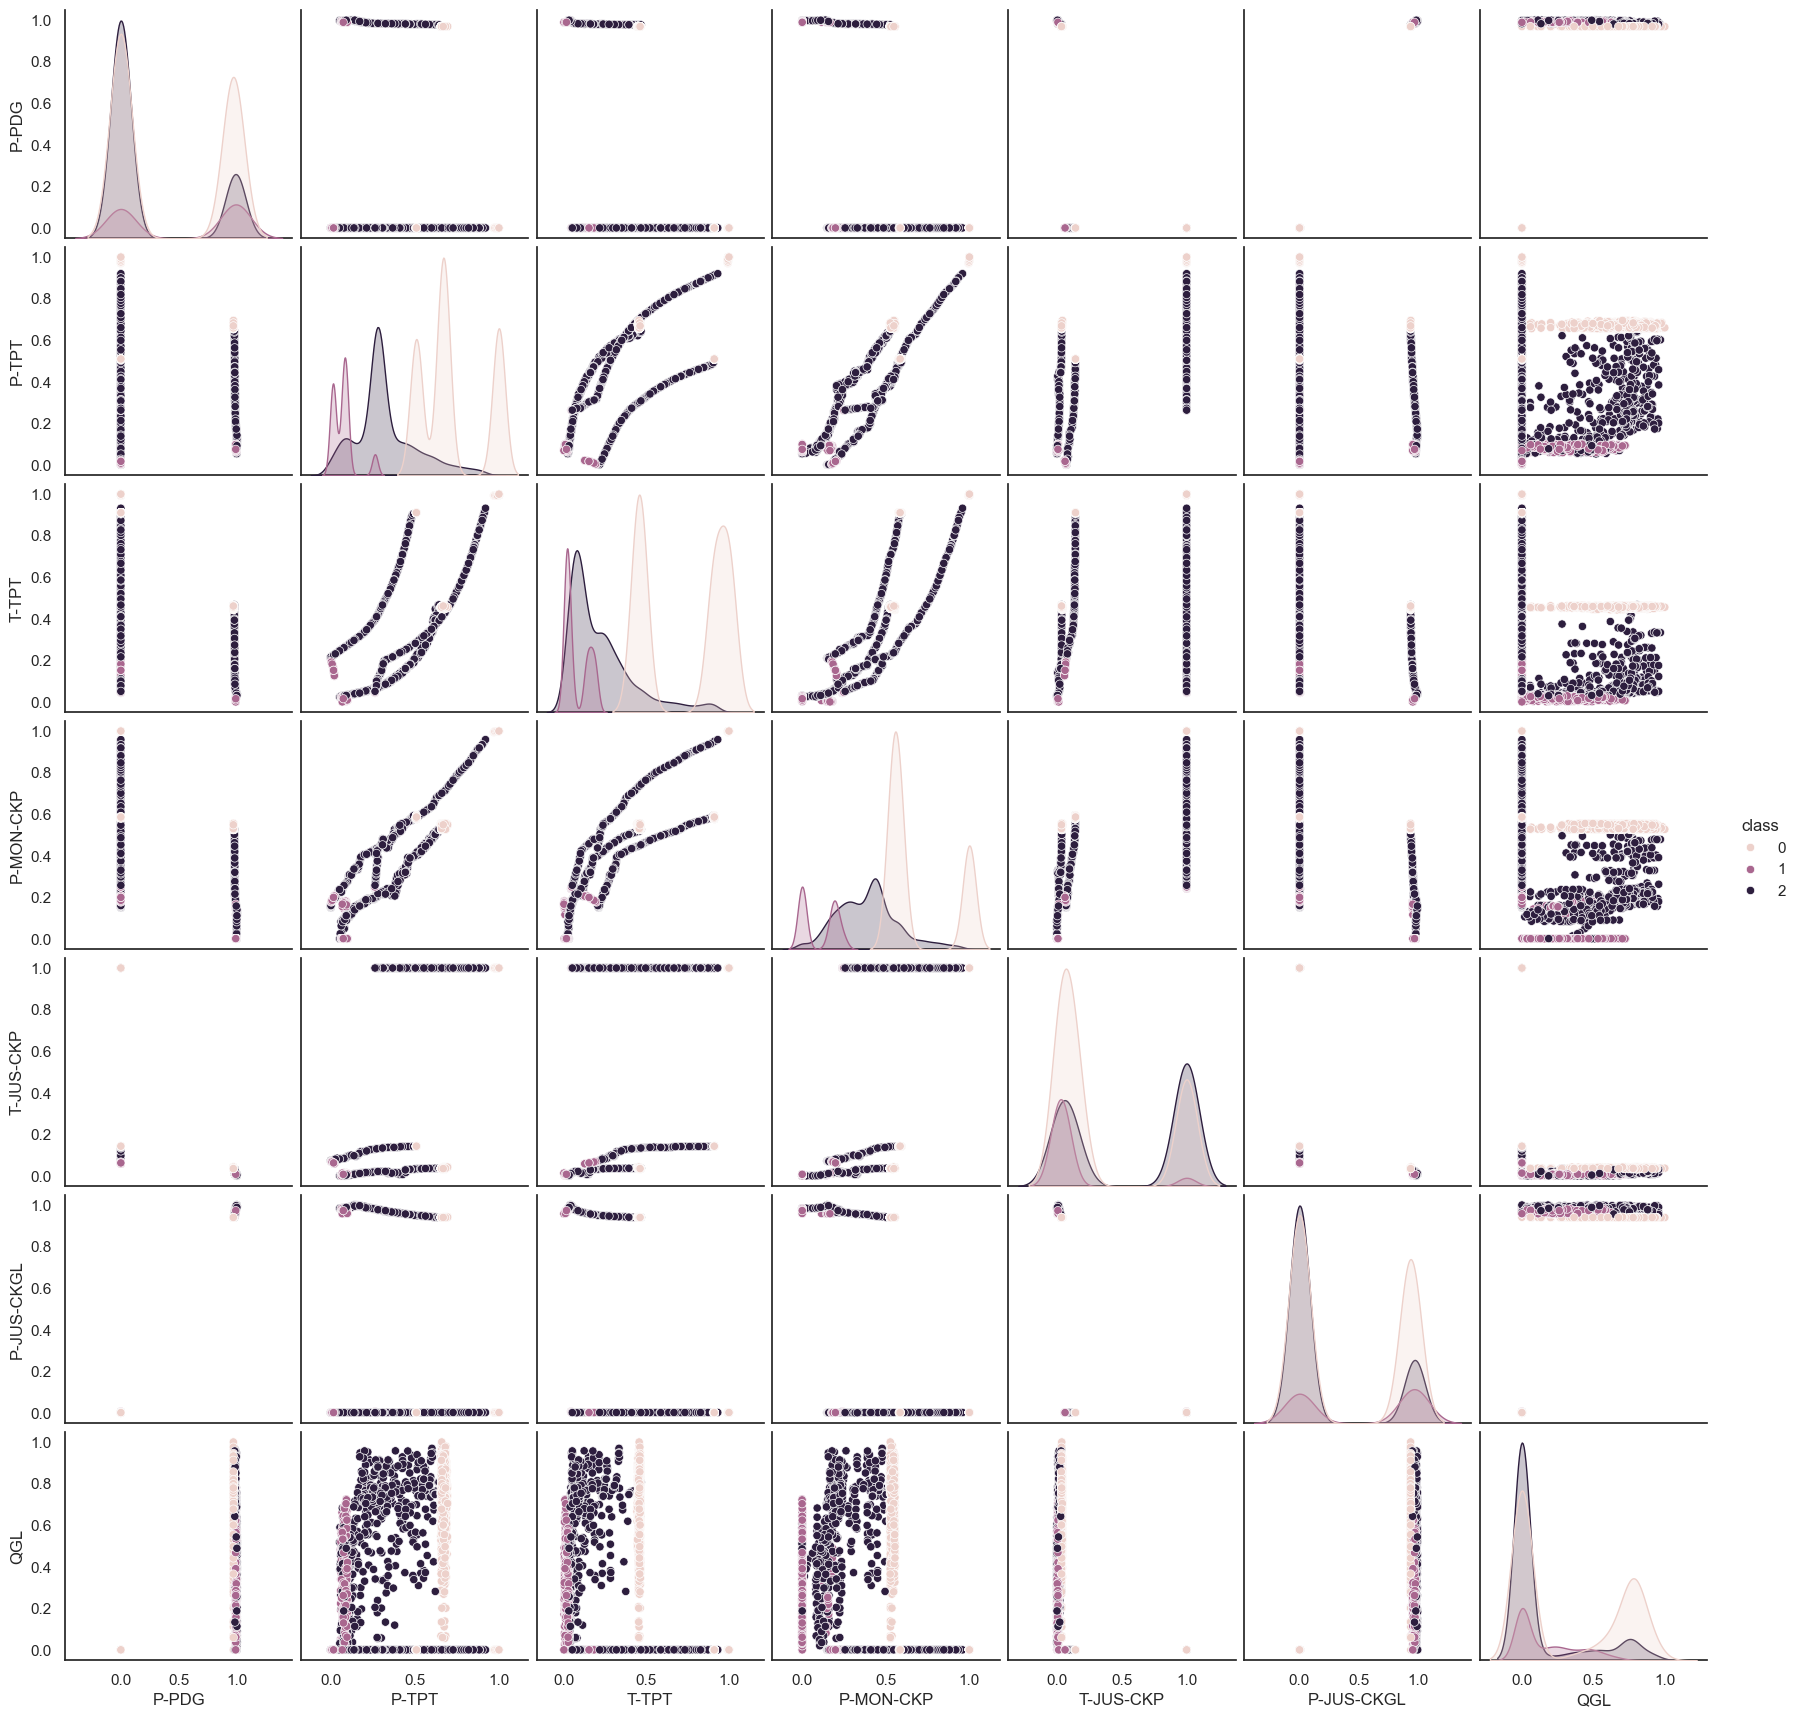

In [95]:
sns.set_style("white")

dados_teste = pd.concat([x_test_scaled_df.reset_index(drop=True),y_test.reset_index(drop=True)],axis=1)

sns.pairplot(dados_teste, hue="class")
